<a href="https://colab.research.google.com/github/sitthatkaja/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CHAPTER 8 : Clustering**


## K-means

Generate Data (เรียก Data)

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)

Explore data (ดู Data)

In [4]:
X.shape

(500, 2)

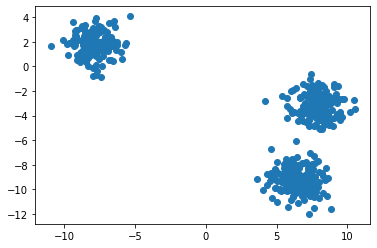

In [5]:

from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

## Clustering 

เริ่มทำ Clustering

In [10]:
#Import

from sklearn.cluster import KMeans

In [11]:
#Define

kmeans = KMeans(n_clusters=2, random_state=6)

In [12]:
#Fit-Predict

y_clust = kmeans.fit_predict(X)
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

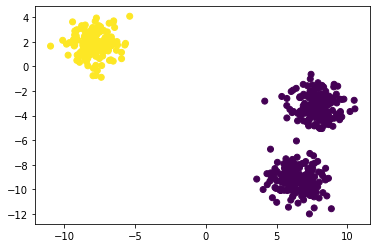

In [13]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

สำหรับทำ 3 กลุ่มให้เปลี่ยน n_cluster = 3


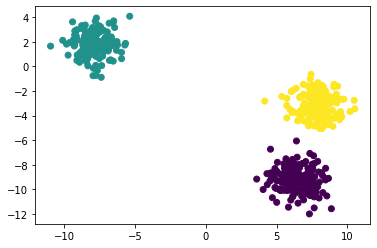

In [14]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)

#fit-predict
y_clust = kmeans.fit_predict(X)

#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

สำหรับทำ 4 กลุ่มให้เปลี่ยน n_cluster = 4

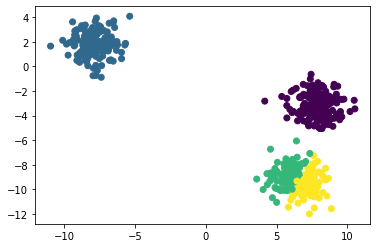

In [15]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)

#fit-predict
y_clust = kmeans.fit_predict(X)

#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

สำหรับทำ 5 กลุ่มให้เปลี่ยน n_cluster = 5 ซึ่งครั้งนี้เราปรับ random_state = 14

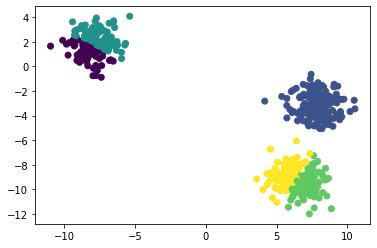

In [16]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')

#fit-predict
y_clust = kmeans.fit_predict(X)

#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

สำหรับทำ 5 กลุ่มให้เปลี่ยน n_cluster = 5 ซึ่งครั้งนี้เราปรับ random_state = 6

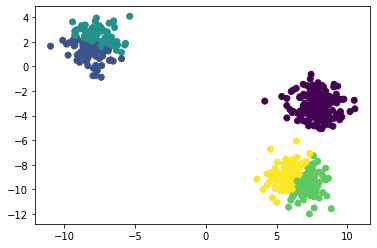

In [17]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')

#fit-predict
y_clust = kmeans.fit_predict(X)

#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## Example Application (Color Quantization)

In [18]:
import cv2
import os

In [19]:
img = cv2.imread('/content/meow.jpg')

In [20]:
img.shape

(550, 1024, 3)

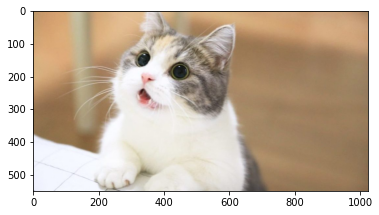

In [21]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

นับจำนวนสี

In [22]:
import numpy as np

In [23]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(36534, 3)


จัดกลุ่มสีให้เหลือ 16 สี

In [24]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [25]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(563200, 3)

In [26]:
final_color = myquantize.fit_predict(img_row)


ใช้ centroid เป็นตัวแทนของสี

In [27]:
centroid = myquantize.cluster_centers_

In [28]:
centroid

array([[167.71240215, 135.99362209, 101.28231499],
       [237.34301854, 234.33154587, 229.19339645],
       [211.81094921, 168.0958896 , 122.85096582],
       [ 94.77372549,  83.46029412,  74.09911765],
       [209.65592357, 199.65660595, 189.86352422],
       [244.93391759, 246.33072191, 252.19258177],
       [121.60173569, 109.35779344,  97.84825571],
       [190.31137901, 178.32686465, 160.20062727],
       [145.41840366, 133.56998814, 122.15090663],
       [227.54592179, 222.00814401, 212.72563625],
       [220.38687112, 181.54205607, 137.52151771],
       [144.8365258 , 113.64497757,  79.70518228],
       [156.55484705, 125.87632148,  92.56902496],
       [ 38.78954164,  39.62136862,  32.9244674 ],
       [173.5103109 , 157.67902401, 133.65045258],
       [196.83574384, 154.49633679, 112.88881297]])

แทนสีคืนลงไป

In [29]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

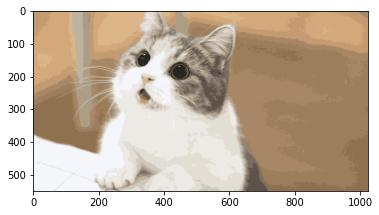

In [30]:

plt.imshow(new_img/255)

In [31]:
plt.imsave('img.jpg',new_img/255)

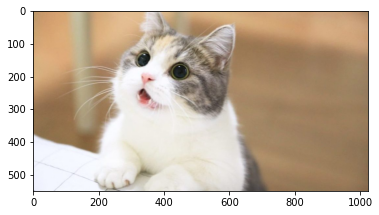

In [32]:

plt.imshow(RGB_img)

***


Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation